In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def retard_angle_1D_ultra_relativistic(alpha_axis) :
    import numpy as np

    psi = np.zeros_like(alpha_axis)
    eta = np.zeros_like(alpha_axis)

    positive_axis = (alpha_axis>0)
    negative_axis = (alpha_axis<0)
    psi[positive_axis] = (24.0*alpha_axis[positive_axis])**(1.0/3.0)
    psi[negative_axis] = -0.5*alpha_axis[negative_axis]
    eta[positive_axis] = 0.5*(np.pi - alpha_axis[positive_axis] - psi[positive_axis]) 
    eta[negative_axis] = 0.5*(-np.pi - alpha_axis[negative_axis] - psi[negative_axis])

    return (psi, eta)

In [20]:
scaled_alpha=600
scaled_chi = 2
_gamma=100.0
n_alpha=100
n_chi = 3

# -- start modif --
peak_factor =  1.0
peak_shift = 0.000
alpha_max = (scaled_alpha * 0.5) / 1e6 * _gamma**3.0
number_of_wavelets_pos = int(n_alpha / 2.0)  # for positive alpha axis
number_of_wavelets_neg = int(n_alpha / 2.0)   # for negative alpha axis

psi_max=(24.0 * alpha_max/_gamma**3.0)**(1.0/3.0)
psi_max_negative_axis = alpha_max/_gamma**3.0/2.0
psi_for_pos_axis = np.linspace(0.0, psi_max, number_of_wavelets_pos)
psi_for_neg_axis = np.linspace(psi_max_negative_axis, 0.0, number_of_wavelets_neg, endpoint=False)

alpha_axis = np.zeros(number_of_wavelets_pos + number_of_wavelets_neg)
alpha_axis[:number_of_wavelets_neg] = -psi_for_neg_axis*2.0
alpha_axis[number_of_wavelets_neg:] = psi_for_pos_axis**3.0/24.0

alpha_axis *= _gamma**3.0
shifted_alpha_axis = peak_factor*(alpha_axis + peak_shift)
alpha = shifted_alpha_axis/_gamma**3.0
psi, eta = retard_angle_1D_ultra_relativistic(alpha)
chi_axis = np.linspace(-scaled_chi/2.0, scaled_chi/2.0, n_chi)
# -- end modif

# radiation far field/potential approx.
far_field_approx = np.zeros_like(shifted_alpha_axis)
positive_range = shifted_alpha_axis>0
far_field_approx[positive_range] = (shifted_alpha_axis[positive_range])**(-1.0/3.0)   # for approximated potential

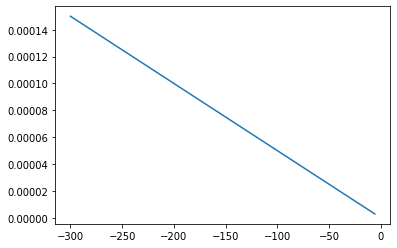

In [21]:
plt.plot(alpha_axis[:number_of_wavelets_neg],psi_for_neg_axis)

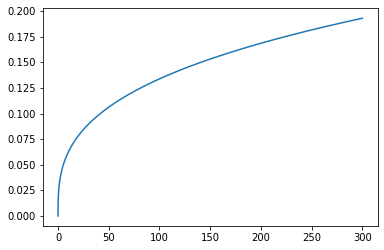

In [22]:
plt.plot(alpha_axis[number_of_wavelets_neg:],psi_for_pos_axis)

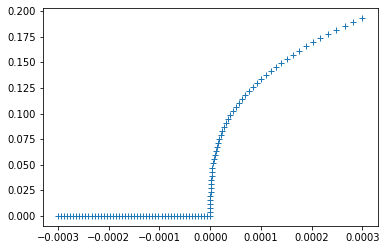

In [23]:
plt.plot(alpha,psi, "+")

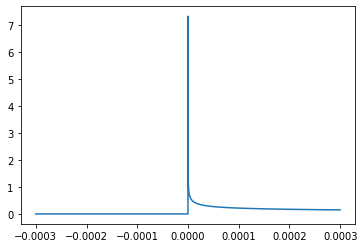

In [24]:
plt.plot(alpha, far_field_approx)

In [21]:
far_field_approx.max()

7.319627752710035

In [22]:
psi_for_pos_axis.min()

0.0

In [23]:
psi.min()

0.0

In [25]:
shifted_alpha_axis[positive_range].min()**(-1.0/3.0)

7.319627752710035